## 1. Analizing data

Let's load some important libraries such as pandas, numpy, seaborn and so on:

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

Now we need to upload our datasets and convert them into dataframes.
Here we have train and test parts. We need them because train part is used for training the model, for letting the machine understand the patterns of the inputs. Test part is used for validating the performance of the trained model in numerical values

In [14]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Let's see the data we have:

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


And types of all the columns:

In [34]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

To know some additional info we can use ".info"

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Let's divide our features on categorical and numerical:

In [74]:
tt = []
for i in train.columns:
    tt.append(i)
    
cat = {}
num = {}

for j, k in enumerate(train.dtypes):
    if str(k) == 'object':
        cat[tt[j]] = str(k)
    else:
        num[tt[j]] = str(k)

In [79]:
for i in cat.keys():
    print(i)

Name
Sex
Ticket
Cabin
Embarked


So, our categorical features are: Name, Sex, Ticket, Cabin, Embarked

In [81]:
for i in num.keys():
    print(i)

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare


And our numerical features are: PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare

# 2. Visualization

Let's take a look at our data vusially:

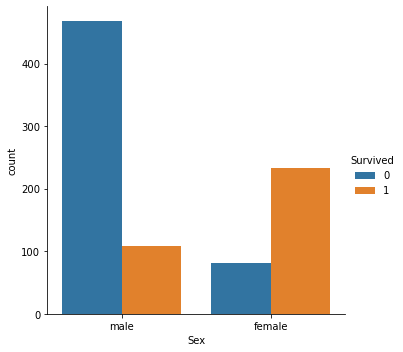

In [83]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = train)

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

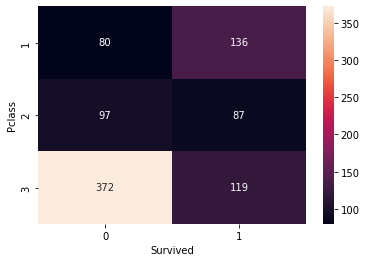

In [84]:
group = train.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
sns.heatmap(pclass_survived, annot = True, fmt ="d")

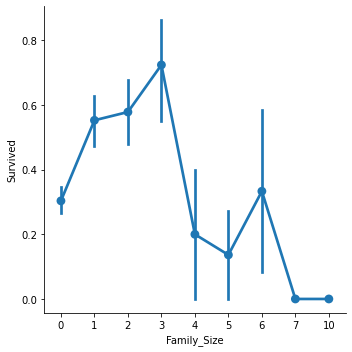

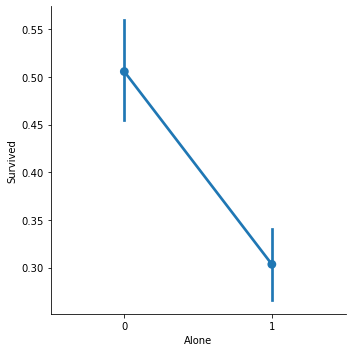

In [85]:
train['Family_Size'] = 0
train['Family_Size'] = train['Parch']+train['SibSp']
 
train['Alone'] = 0
train.loc[train.Family_Size == 0, 'Alone'] = 1
 
sns.factorplot(x ='Family_Size', y ='Survived', data = train)
 
sns.factorplot(x ='Alone', y ='Survived', data = train)

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

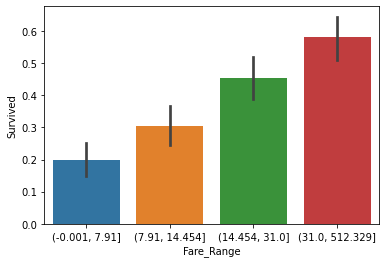

In [87]:
train['Fare_Range'] = pd.qcut(train['Fare'], 4)

sns.barplot(x ='Fare_Range', y ='Survived', data = train)

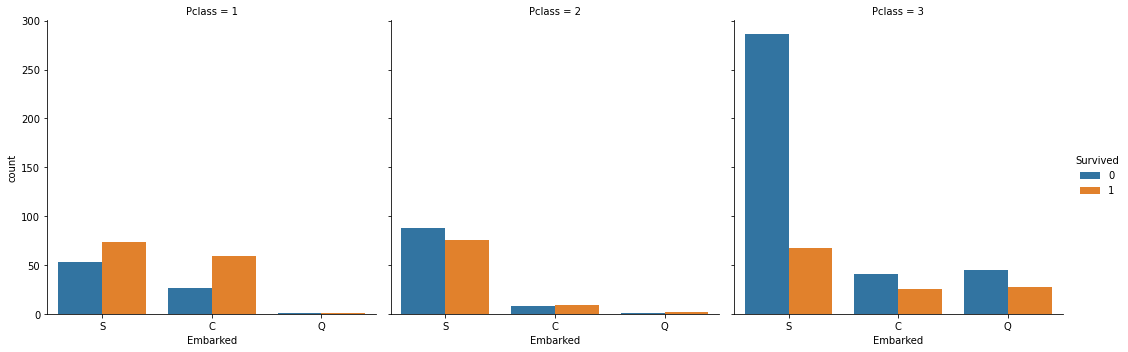

In [88]:
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = train)

## 3. Cleaning the data